01/16~01/19
1. Python 기초 => 조건문 반복문 활용한 매우 간단한 조건 활용
=> 각자 조사하여 코드와 주석처리하여 정리해오기
2. Pandas 기초 => Pandas, numpy를 이용하여 데이터 분석에 필요한 함수를 정리해보고 Olympics 데이터 혹은 다른 데이터를 이용하여 분석
=> 데이터를 Pandas, numpy를 이용해 각자 분석하고 주석처리 및 column 설명
3. 데이터 분석과정 중 데이터간 연관성, 설명을 위한 상관계수, 전처리 등 필요한 내용 정리해보기 + boston housing 데이터 선형회귀 모델 구현 및 해석
=> boston housing 데이터를 각자 전처리 분석하고 선형회귀
=>결과 해석 및 설명 자료
------------------------------------------------------------------------

01/19~01/22
4. breast_cancer 데이터 활용 실습 진행 
=> KNN, Decision Tree, Random Forest 이외에 다른 분류 이용해보거나 조사, 해당 기법들 각각 설명, 결과 설명 등
5. 3, 4에서 만들었던 모델의 성능을 높이는 방법을 각자 희망하는대로 하여 성능을 높이고 그 내용과 코드를 주석과 마크다운을 이용해서 정리하기

### 1. head와 tail 확인(변수 확인)
### 2. 결측치 처리
### 3. descibe를 이용하여 전체적인 지표와 상관계수 확인
# 4. 추가적인 열과 열과의 관계 확인(가설을 설정하고 확인하는 방식)
# 5. 시각화

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 전처리 과정 -> 중고장터 데이터 셋

In [124]:
df=pd.read_excel('Fraud_10000-1.xlsx')

In [63]:
df.head()

,serial,fraud,day,membership,img_count,price,len_title,len_text
0,19086,0,2,Silver,9,260000,29,186
1,45553,0,6,Bronze,9,190000,32,100
2,74087,0,5,Silver,11,150000,14,33
3,101237,0,2,Silver,6,7777,12,83
4,95888,0,1,Silver,315,2000,14,6679


In [64]:
df.tail()

,serial,fraud,day,membership,img_count,price,len_title,len_text
9995,75279,0,2,Premium,6,110000,37,582
9996,696,0,5,Silver,13,2000,30,494
9997,73280,0,2,Premium,4,17600,18,220
9998,45212,0,4,Silver,11,150000,7,33
9999,121915,1,5,Bronze,4,220000,9,109


In [65]:
df.describe()

,serial,fraud,day,img_count,price,len_title,len_text
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,70552.041400,0.231200,3.963900,21.417900,3.762313e+05,25.220500,539.706700
std,40728.433926,0.421621,2.063255,88.709617,1.736910e+06,15.060271,2098.945413
min,31.000000,0.000000,1.000000,3.000000,2.000000e+03,2.000000,0.000000
25%,35469.500000,0.000000,2.000000,7.000000,1.500000e+04,15.000000,89.000000
50%,69953.000000,0.000000,4.000000,9.000000,7.000000e+04,22.000000,164.000000
75%,106126.750000,0.000000,6.000000,13.000000,2.600000e+05,32.000000,296.000000
max,141053.000000,1.000000,7.000000,2293.000000,1.000000e+08,140.000000,32767.000000


In [66]:
#fraud인 데이터 크기 확인
df['fraud'].sum()

2312

In [68]:
#결측치 확인
df.isnull().sum()

serial        0
fraud         0
day           0
membership    0
img_count     0
price         0
len_title     0
len_text      0
dtype: int64

In [71]:
#원핫인코딩: 카테고리 변수와 문자 변수를 더미변수화 시키기
df=pd.get_dummies(df,columns=['day','membership'])
df

,serial,fraud,img_count,price,len_title,len_text,day_1,day_2,day_3,day_4,day_5,day_6,day_7,membership_Bronze,membership_Gold,membership_NoLevel,membership_Premium,membership_Silver,membership_VIP
0,19086,0,9,260000,29,186,0,1,0,0,0,0,0,0,0,0,0,1,0
1,45553,0,9,190000,32,100,0,0,0,0,0,1,0,1,0,0,0,0,0
2,74087,0,11,150000,14,33,0,0,0,0,1,0,0,0,0,0,0,1,0
3,101237,0,6,7777,12,83,0,1,0,0,0,0,0,0,0,0,0,1,0
4,95888,0,315,2000,14,6679,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,75279,0,6,110000,37,582,0,1,0,0,0,0,0,0,0,0,1,0,0
9996,696,0,13,2000,30,494,0,0,0,0,1,0,0,0,0,0,0,1,0
9997,73280,0,4,17600,18,220,0,1,0,0,0,0,0,0,0,0,1,0,0
9998,45212,0,11,150000,7,33,0,0,0,1,0,0,0,0,0,0,0,1,0


In [75]:
#상관계수 확인
df.corr()

,serial,fraud,img_count,price,len_title,len_text,day_1,day_2,day_3,day_4,day_5,day_6,day_7,membership_Bronze,membership_Gold,membership_NoLevel,membership_Premium,membership_Silver,membership_VIP
serial,1.000000,0.716006,-0.021035,-0.048193,-0.011365,-0.017196,-0.022445,-0.028022,-0.009446,-0.001529,0.013017,0.051387,0.003195,0.026458,-0.005312,0.004159,0.012254,-0.026364,-0.014753
fraud,0.716006,1.000000,-0.011140,-0.038121,-0.002391,-0.016677,-0.027036,-0.076533,0.010423,-0.037929,0.013046,0.074129,0.050178,0.009442,0.009889,-0.010970,-0.004550,-0.009037,-0.005484
img_count,-0.021035,-0.011140,1.000000,-0.023432,0.200571,0.685731,-0.015731,-0.002406,0.001344,0.011392,-0.001697,0.004463,0.002926,-0.034877,-0.001700,-0.001673,-0.023056,0.041566,-0.001174
price,-0.048193,-0.038121,-0.023432,1.000000,0.022502,-0.016901,-0.005164,-0.016567,-0.002603,0.022569,0.030540,0.011436,-0.033350,0.004246,0.086806,-0.002375,0.006234,-0.038990,-0.001942
len_title,-0.011365,-0.002391,0.200571,0.022502,1.000000,0.260980,-0.021763,0.022847,0.020613,0.005318,-0.014880,0.013474,-0.024607,-0.058753,0.047248,-0.003946,0.018420,0.024199,0.015127
len_text,-0.017196,-0.016677,0.685731,-0.016901,0.260980,1.000000,-0.019148,0.015146,0.005055,0.014403,-0.013696,0.019852,-0.020161,-0.034651,-0.010540,0.004575,-0.011791,0.039067,0.001302
day_1,-0.022445,-0.027036,-0.015731,-0.005164,-0.021763,-0.019148,1.000000,-0.181070,-0.171262,-0.172030,-0.150688,-0.154822,-0.190953,-0.001016,0.005224,0.005638,0.001430,-0.001933,-0.004193
day_2,-0.028022,-0.076533,-0.002406,-0.016567,0.022847,0.015146,-0.181070,1.000000,-0.176417,-0.177208,-0.155224,-0.159483,-0.196702,-0.028017,0.007644,-0.008639,0.040213,0.003167,-0.004319
day_3,-0.009446,0.010423,0.001344,-0.002603,0.020613,0.005055,-0.171262,-0.176417,1.000000,-0.167609,-0.146815,-0.150844,-0.186047,0.005220,0.008080,0.006114,-0.023662,0.002513,0.024482
day_4,-0.001529,-0.037929,0.011392,0.022569,0.005318,0.014403,-0.172030,-0.177208,-0.167609,1.000000,-0.147474,-0.151520,-0.186881,-0.007080,-0.019833,0.006032,0.024887,0.001783,-0.004103


In [76]:
df.corrwith(df.img_count)
#len_text와 img_count 양의 상관관계

serial               -0.021035
fraud                -0.011140
img_count             1.000000
price                -0.023432
len_title             0.200571
len_text              0.685731
day_1                -0.015731
day_2                -0.002406
day_3                 0.001344
day_4                 0.011392
day_5                -0.001697
day_6                 0.004463
day_7                 0.002926
membership_Bronze    -0.034877
membership_Gold      -0.001700
membership_NoLevel   -0.001673
membership_Premium   -0.023056
membership_Silver     0.041566
membership_VIP       -0.001174
dtype: float64

### 가설1. 사기글일수록 이미지 수가 적을 것이다?

In [78]:
#가설 확인을 위해 fraud인 데이터셋 추가로 생성
df_fraud=df[df['fraud']==1]
df_notfraud=df[df['fraud']==0]

In [79]:
df_fraud.img_count.describe()
#사기글의 경우 이미지수의 최솟값이 3, 최댓값이 1725, 평균이 약 19

count    2312.000000
mean       19.615917
std        65.932452
min         3.000000
25%         7.000000
50%         9.000000
75%        13.000000
max      1725.000000
Name: img_count, dtype: float64

In [80]:
df_notfraud.img_count.describe()
#사기글이 아닌 경우 이미지수의 최솟값이 3, 최댓값이 2293, 평균이 약 21

count    7688.000000
mean       21.959807
std        94.488556
min         3.000000
25%         7.000000
50%         9.000000
75%        12.000000
max      2293.000000
Name: img_count, dtype: float64

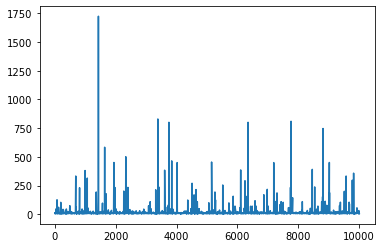

In [81]:
#이상치가 존재하는지 시각화를 통해 확인
plt.plot(df_fraud['img_count']) #이상치 존재

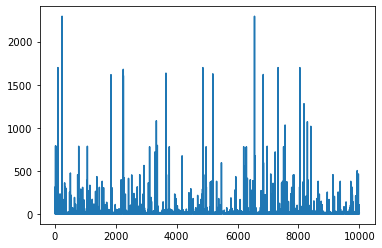

In [82]:
plt.plot(df_notfraud['img_count'])

In [83]:
df_fraud1=df_fraud[df_fraud['img_count']<1725] #앞에서 확인한 이상치 제거

In [84]:
df_fraud1.img_count.describe()
#이상치 제거했을 때 최댓값은 830, 평균은 약 18
#사기글이 아닐수록 이미지수가 많을 확률이 큼

count    2311.000000
mean       18.877975
std        55.582424
min         3.000000
25%         7.000000
50%         9.000000
75%        13.000000
max       830.000000
Name: img_count, dtype: float64

### 가설2. membership 등급이 높을수록 이미지수가 많다?

In [85]:
df.sum()
#멤버십을 살펴보면 NoLevel과 Vip 행은 아주 적어서 분석 결과를 일반화시키기에는 어려움

serial                 705520414
fraud                       2312
img_count                 214179
price                 3762313091
len_title                 252205
len_text                 5397067
day_1                       1495
day_2                       1572
day_3                       1430
day_4                       1441
day_5                       1144
day_6                       1200
day_7                       1718
membership_Bronze           1279
membership_Gold              216
membership_NoLevel             4
membership_Premium           335
membership_Silver           8165
membership_VIP                 1
dtype: int64

In [86]:
#멤버십 별로 데이터셋 생성
df_bronze=df[df['membership_Bronze']==1]
df_silver=df[df['membership_Silver']==1]
df_gold=df[df['membership_Gold']==1]
df_premium=df[df['membership_Premium']==1]
df_nolevel=df[df['membership_NoLevel']==1]
df_vip=df[df['membership_VIP']==1]

In [87]:
df_nolevel.img_count

29       5
2310    17
5006    29
9623     5
Name: img_count, dtype: int64

In [88]:
df_vip.img_count
#vip라고 해서 크게 높지 않음

3765    11
Name: img_count, dtype: int64

In [89]:
df_bronze.img_count.describe()
#평균 13, 평균과 최댓값의 차이가 크다 -> 이상치 확인

count    1279.000000
mean       13.339328
std        30.797927
min         3.000000
25%         6.000000
50%         8.000000
75%        12.000000
max       830.000000
Name: img_count, dtype: float64

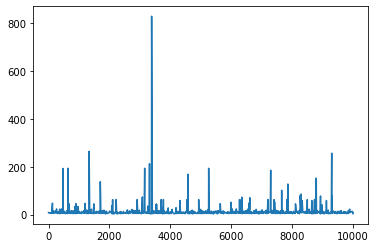

In [90]:
plt.plot(df_bronze['img_count'])
#이상치 830 존재

In [91]:
df_bronze=df_bronze[df_bronze['img_count']<830]
df_bronze.img_count.describe()
#이상치 제거 평균 12

count    1278.000000
mean       12.700313
std        20.653805
min         3.000000
25%         6.000000
50%         8.000000
75%        12.000000
max       265.000000
Name: img_count, dtype: float64

In [92]:
df_silver.img_count.describe()
#평균 23

count    8165.000000
mean       23.165830
std        97.131666
min         3.000000
25%         7.000000
50%         9.000000
75%        13.000000
max      2293.000000
Name: img_count, dtype: float64

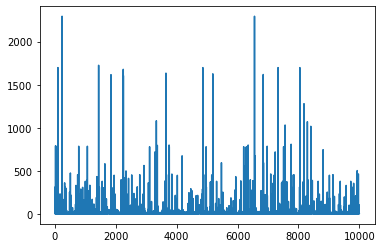

In [93]:
plt.plot(df_silver['img_count'])

In [94]:
df_gold.img_count.describe()
#평균 20

count    216.000000
mean      20.402778
std       36.000127
min        5.000000
25%       10.000000
50%       12.000000
75%       15.000000
max      238.000000
Name: img_count, dtype: float64

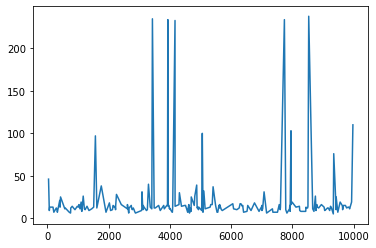

In [95]:
plt.plot(df_gold['img_count'])

In [96]:
df_premium.img_count.describe()
#평균 10

count    335.000000
mean      10.432836
std        8.062302
min        4.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       80.000000
Name: img_count, dtype: float64

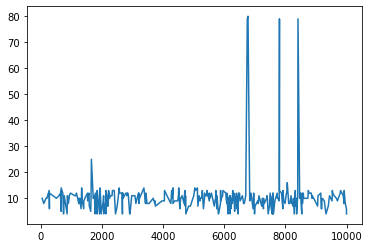

In [97]:
plt.plot(df_premium['img_count'])

In [98]:
#등급이 높아질수록 이미지 수가 많아진다고 보기에는 어려움

### 가설3. 텍스트가 많을수록 이미지가 많을 것이다?

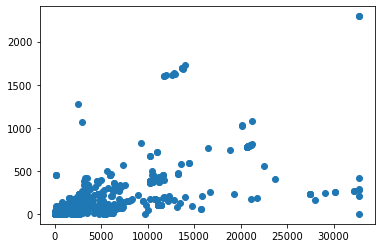

In [99]:
plt.scatter(df['len_text'],df['img_count'],linewidth=1)
#이미지가 특히 많을 글일수록 텍스트가 많은 경향이 있음

# 보스턴 주택 데이터셋

In [2]:
from sklearn import datasets
housing = datasets.load_boston()

/Users/ohsongmi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [11]:
# 로드한 boston 전체 데이터에 key 값을 출력
print(housing.keys())
# boston 전체 데이터 중 data에 대한 전체 행, 열 길이를 출력
print(housing.data.shape)
# boston 데이터에 컬럼 이름을 출력 
print(housing.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [101]:
df = pd.DataFrame(housing.data)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [102]:
#열 이름 변경
df.columns = housing.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [103]:
df['Price'] =  housing.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
df.isnull() #Nan(결측치)인 값 알려주기

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()
#결측치가 존재하지 않는다

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [25]:
df.notnull() #Nan아닌 값 알려주기

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,True,True,True,True,True,True,True,True,True,True,True
502,True,True,True,True,True,True,True,True,True,True,True,True,True,True
503,True,True,True,True,True,True,True,True,True,True,True,True,True,True
504,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.corr() #상관계수

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
df.cov() #공분산

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [16]:
df.CRIM.corr(df.ZN) #특정 변수 지정 가능

-0.2004692196625475

In [17]:
df.CRIM.cov(df.ZN)

-40.215956028802886

In [18]:
df.corrwith(df.AGE) #하나의 변수와 나머지 변수의 상관관계

CRIM       0.352734
ZN        -0.569537
INDUS      0.644779
CHAS       0.086518
NOX        0.731470
RM        -0.240265
AGE        1.000000
DIS       -0.747881
RAD        0.456022
TAX        0.506456
PTRATIO    0.261515
B         -0.273534
LSTAT      0.602339
Price     -0.376955
dtype: float64

In [21]:
df["Price"].unique() #존재하는 값을 중복 제거하고 반환

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

In [22]:
df["Price"].value_counts() #존재하는 값들의 수를 세서 반환 

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: Price, Length: 229, dtype: int64

<AxesSubplot:>

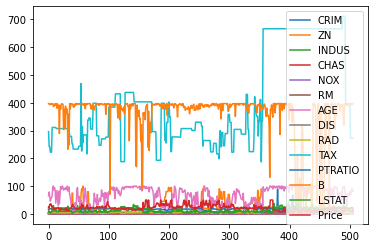

In [31]:
df.plot()

<AxesSubplot:xlabel='AGE', ylabel='RM'>

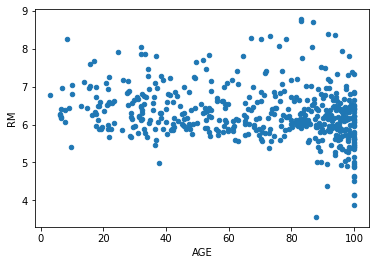

In [44]:
df.plot(kind='scatter', x='AGE', y='RM')

<AxesSubplot:ylabel='Density'>

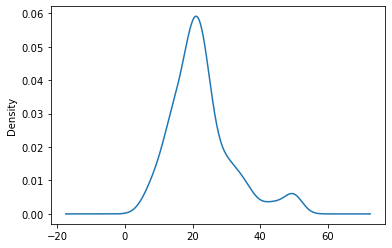

In [45]:
df['Price'].plot(kind='kde')

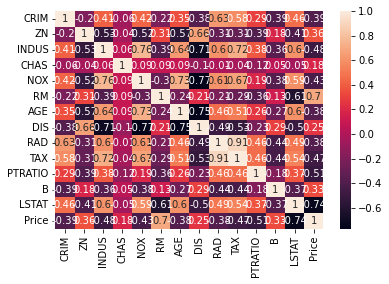

In [36]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()
# 상관행렬을 통해서 price와 강한 상관관계를 가지는 것은
# LSTAT와 RM인 것을 확인할 수 있다

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='Price'>,
        <AxesSubplot:xlabel='RM', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='Price', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>]], dtype=object)

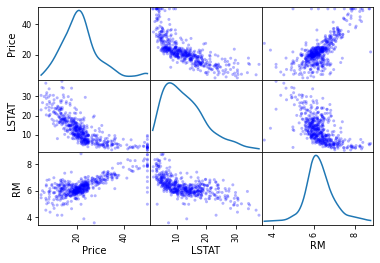

In [47]:
cols = ["Price","LSTAT", "RM"]
pd.plotting.scatter_matrix(df[cols],diagonal='kde',color='b',alpha=0.3)

In [104]:
x = df.drop(columns=["Price"])
y = df["Price"]

In [105]:
#모델 훈련을 위한 train 데이터와 test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [106]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
lr.coef_

array([-1.53004848e-01,  4.79388437e-02, -8.60131597e-03,  2.57986675e+00,
       -1.46325645e+01,  3.96283436e+00, -7.92357629e-03, -1.46078023e+00,
        3.45431204e-01, -1.24503134e-02, -9.19092768e-01,  1.32203623e-02,
       -5.17255347e-01])

In [121]:
lr.coef_.max()

3.9628343554904886

In [120]:
x.columns[lr.coef_==lr.coef_.max()]
#양의 방향으로 영향이 가장 큰 변수

Index(['RM'], dtype='object')

In [122]:
lr.coef_.min()

-14.63256451265766

In [123]:
x.columns[lr.coef_==lr.coef_.min()]
#음의 방향으로 영향이 가장 큰 변수

Index(['NOX'], dtype='object')

In [108]:
lr.intercept_

32.21412038974385

In [109]:
lr.score(X_train,y_train)

0.7468034208269783

In [110]:
lr.score(X_test,y_test)

0.7059096071098045